<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Muestreo_importancia_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APROXIMACION METODO IMPORTANCIA


In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Funcion a aproximar
def f(x):
  f=np.cos(np.pi*x/2)
  return f

In [3]:
# Función para calcular muestra
def g(x):
  g=1
  return g

In [6]:
#Funcion envolvente
def p(x):
  p=3/2*(1-x**2)
  return p

In [7]:
def Muestra(n):          #Esta función calcula la muestra
  lista=[]
  x=0
  c=3/2
  for i in range(n):
    u1=rnd.random()            # Primer variable aleatoria u ~ U(0,1)
    u2=rnd.random()            # Segunda variable aleatoria u ~ U(0,0.5)
    if u1 <= f(u2)/(c*g(u2)):            # El condicional determina que F^-1(u2) se calcula
      x=u2
    lista.append(x)           #Se guardan los valores de X ~ f(x)
  return lista

Aproximación:  0.6385092703538406
El tiempo de ejecución del programa es:  0.711585521697998


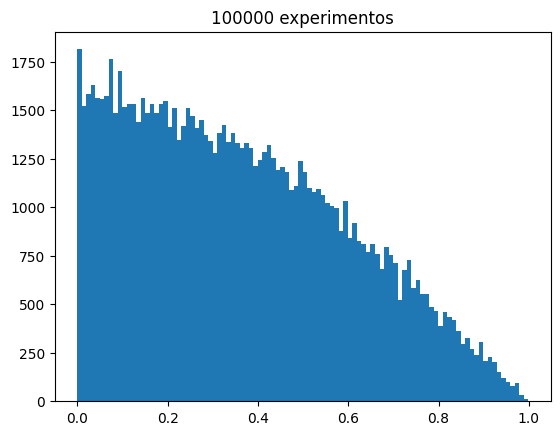

In [32]:
#SIMULACION
import time             #Calcula el tiempo de ejecución
start_time=time.time()
I=0
n=100000                # n repeticiones del ensayo
e=Muestra(n)
for i in range (len(e)):
  I+=(1/n)*(f(e[i])/p(e[i]))
print("Aproximación: ",I)
plt.hist(e, bins=100)          #Imprime histograma
plt.title('100000 experimentos')
end_time=time.time()
print("El tiempo de ejecución del programa es: ",end_time-start_time)
plt.show()

# METODO DE ACEPTACION Y RECHAZO

In [18]:
def muestra_sim(c):                      #Esta función se utiliza para la simulación, NO GRAFICA los puntos debajo de la curva
  global n
  n=0
  u1=rnd.random()                        #Coordenada del eje X
  u2=rnd.random()                        #Coordenada del eje Y
  if u2 <= f(u1):       #Condición de la muestra
        n+=1                             #Número de éxito +1
  return n

In [19]:
def estimacion_iter(N):                           #Esta función se utiliza para la simulación, NO GRAFICA los puntos debajo de la cur
  estimacion=[]
  iter=0                                    #No. de itercaiones
  for i in range(N):
    iter+=muestra_sim(f(1))
    estimacion.append(iter/(i+1))                #Guarda en una lista la estimación
  return np.mean(estimacion)                     #Devuelve la media de las estimaciones de cada experimento

In [20]:
def simulacion(M):          #Esta función es para realizar la simulación mediante varias corridas del experimento
  r=[]
  for i in range(M):
    R=estimacion_iter(50)        #Si la muestra en el experimento es chica, el número de corridas puede ser alto y viceversa
    r.append(R)
  return r

Valor de la integral estimado: 0.6316043265566943
El tiempo de ejecución del programa es:  0.2017066478729248


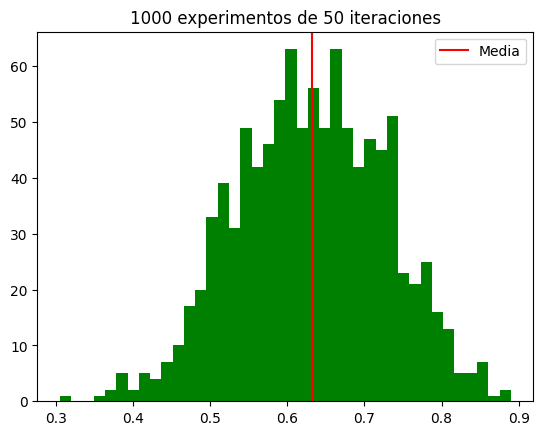

In [31]:
start_time=time.time()
S=simulacion(1000)                    #Se simula el experimetno mediante n corridas
print('Valor de la integral estimado:',np.mean(S))
end_time=time.time()
print("El tiempo de ejecución del programa es: ",end_time-start_time)
plt.title('1000 experimentos de 50 iteraciones')
plt.axvline(np.mean(S),label='Media',color='red')
plt.legend()
plt.hist(S,bins=40,color="green")    #Grafica el histograma de las estimaciones calculadas
plt.show()

El tiempo de ejecución del metodo **Aceptación y Rechazo resultó ser menor al del Método de importancia**